### Conducted by: Ivy Ly
### binhnhily.ivy@outlook.com.au

In [110]:
import pandas as pd
from matplotlib import pyplot as plt
from datetime import timedelta
plt.style.use('seaborn')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# Analysis of Cycling Data

## Loading Data

The first dataset is an export of my ride data from [Strava](https://strava.com/), an online social 
network site for cycling and other sports.  This data is a log of every ride since the start of 2018
and contains summary data like the distance and average speed.  It was exported using 
the script `stravaget.py` which uses the stravalib module to read data. Some details of
the fields exported by that script can be seen in [the documentation for stravalib](https://pythonhosted.org/stravalib/api.html#stravalib.model.Activity). 

The exported data is a CSV file so that's easy to read, however the date information in the file is 
recorded in a different timezone (UTC) so we need to do a bit of conversion.  In reading the data I'm
setting the index of the data frame to be the datetime of the ride. 

If the below cell gives error in `tz_localize`, use `tz_convert` as Pandas is time zone aware. 

In [111]:
strava = pd.read_csv('data/strava_export.csv', index_col='date', parse_dates=True)
strava.index = strava.index.tz_convert('UTC')
strava.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type
date,,,,,,,,,,
2018-01-02 20:47:51+00:00,100.6,21.0,73.8,False,15.2,94,316.00 m,10,73,Ride
2018-01-04 01:36:53+00:00,NaN,24.0,131.7,False,18.0,52,236.00 m,5,46,Ride
2018-01-04 02:56:00+00:00,83.1,25.0,13.8,False,0.0,3,0.00 m,2,2,Ride
2018-01-04 05:37:04+00:00,110.1,24.0,113.6,False,22.9,77,246.00 m,8,64,Ride
2018-01-05 19:22:46+00:00,110.9,20.0,147.7,True,58.4,189,676.00 m,12,144,Ride


The second dataset comes from an application called [GoldenCheetah](https://www.goldencheetah.org/) which provides
some analytics services over ride data.  This has some of the same fields but adds a lot of analysis of the 
power, speed and heart rate data in each ride.  This data overlaps with the Strava data but doesn't include all 
of the same rides. 

Again we create an index using the datetime for each ride, this time combining two columns in the data (date and time) 
and localising to Sydney so that the times match those for the Strava data. 

In [112]:
cheetah = pd.read_csv('data/cheetah.csv', skipinitialspace=True)
cheetah.index = pd.to_datetime(cheetah['date'] + ' ' + cheetah['time'])
cheetah.index = cheetah.index.tz_localize('Australia/Sydney')
cheetah.head()

,date,time,filename,axPower,aPower Relative Intensity,aBikeScore,Skiba aVI,aPower Response Index,aIsoPower,aIF,...,Rest AVNN,Rest SDNN,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS
2018-01-28 06:39:49+11:00,01/28/18,06:39:49,2018_01_28_06_39_49.json,202.211,0.75452,16.6520,1.31920,1.67755,223.621,0.83441,...,0,0,0,0,0,0,0,222.856,0.83155,20.2257
2018-01-28 07:01:32+11:00,01/28/18,07:01:32,2018_01_28_07_01_32.json,226.039,0.84343,80.2669,1.21137,1.54250,246.185,0.91860,...,0,0,0,0,0,0,0,245.365,0.91554,94.5787
2018-02-01 08:13:34+11:00,02/01/18,08:13:34,2018_02_01_08_13_34.json,0.000,0.00000,0.0000,0.00000,0.00000,0.000,0.00000,...,0,0,0,0,0,0,0,0.000,0.00000,0.0000
2018-02-06 08:06:42+11:00,02/06/18,08:06:42,2018_02_06_08_06_42.json,221.672,0.82714,78.8866,1.35775,1.86002,254.409,0.94929,...,0,0,0,0,0,0,0,253.702,0.94665,98.3269
2018-02-07 17:59:05+11:00,02/07/18,17:59:05,2018_02_07_17_59_05.json,218.211,0.81422,159.4590,1.47188,1.74658,233.780,0.87231,...,0,0,0,0,0,0,0,232.644,0.86808,171.0780


The GoldenCheetah data contains many many variables (columns) and we won't go into all of them here. Some
that are of particular interest for the analysis below are:

Here are definitions of some of the more important fields in the data. Capitalised fields come from the GoldenCheetah data
while lowercase_fields come from Strava. There are many cases where fields are duplicated and in this case the values
should be the same, although there is room for variation as the algorithm used to calculate them could be different
in each case. 

  * Duration - overall duration of the ride, should be same as elapsed_time
  * Time Moving - time spent moving (not resting or waiting at lights), should be the same as moving_time
  * Elevation Gain - metres climbed over the ride
  * Average Speed - over the ride
  * Average Power - average power in watts as measured by a power meter, relates to how much effort is being put in to the ride, should be the same as  * average_watts' from Strava
  * Nonzero Average Power - same as Average Power but excludes times when power is zero from the average
  * Average Heart Rate - should be the same as average_heartrate
  * Average Cadence - cadence is the rotations per minute of the pedals
  * Average Temp - temperature in the environment as measured by the bike computer (should be same as average_temp)
  * VAM - average ascent speed - speed up hills
  * Calories (HR) - Calorie expendature as estimated from heart rate data
  * 1 sec Peak Power - this and other  'Peak Power' measures give the maximum power output in the ride over this time period.  Will be higher for shorter periods. High values in short periods would come from a very 'punchy' ride with sprints for example.
  * 1 min Peak Hr - a similar measure relating to Heart Rate
  * NP - Normalised Power, a smoothed average power measurement, generally higher than Average Power 
  * TSS - Training Stress Score, a measure of how hard a ride this was
  * device_watts - True if the power (watts) measures were from a power meter, False if they were estimated
  * distance - distance travelled in Km
  * kudos - likes from other Strava users (social network)
  * workout_type - one of  'Race',  'Workout' or  'Ride'
  
  
Some of the GoldenCheetah parameters are defined [in thier documentation](https://github.com/GoldenCheetah/GoldenCheetah/wiki/UG_Glossary).  

## Combining Cheetah and Strava dataframes

The goal is to keep only those rows of data 
that appear in __both__ data frames so that we have complete data for every row.  

In [113]:
complete_df = strava.join(cheetah, how= "inner")
print(complete_df.head())
print(complete_df.shape)

                           average_heartrate  average_temp  average_watts  \
2018-01-27 19:39:49+00:00              120.6          21.0          153.4   
2018-01-27 20:01:32+00:00              146.9          22.0          187.7   
2018-01-31 21:13:34+00:00              109.8          19.0          143.0   
2018-02-05 21:06:42+00:00              119.3          19.0          165.9   
2018-02-07 06:59:05+00:00              124.8          20.0          151.0   

                          device_watts  distance  elapsed_time elevation_gain  \
2018-01-27 19:39:49+00:00         True       7.6            17        95.00 m   
2018-01-27 20:01:32+00:00         True      38.6            67       449.00 m   
2018-01-31 21:13:34+00:00        False      26.3           649       612.00 m   
2018-02-05 21:06:42+00:00         True      24.3            69       439.00 m   
2018-02-07 06:59:05+00:00         True      47.1           144       890.00 m   

                           kudos  moving_time work

In [121]:
#Remove rides with no measured power
complete_df.drop(complete_df[complete_df['device_watts']== False].index, inplace = True)
print(complete_df.head())
print(complete_df.shape)

                           average_heartrate  average_temp  average_watts  \
2018-01-27 19:39:49+00:00              120.6          21.0          153.4   
2018-01-27 20:01:32+00:00              146.9          22.0          187.7   
2018-02-05 21:06:42+00:00              119.3          19.0          165.9   
2018-02-07 06:59:05+00:00              124.8          20.0          151.0   
2018-02-09 19:18:03+00:00              123.0          20.0          145.9   

                          device_watts  distance  elapsed_time elevation_gain  \
2018-01-27 19:39:49+00:00         True       7.6            17        95.00 m   
2018-01-27 20:01:32+00:00         True      38.6            67       449.00 m   
2018-02-05 21:06:42+00:00         True      24.3            69       439.00 m   
2018-02-07 06:59:05+00:00         True      47.1           144       890.00 m   
2018-02-09 19:18:03+00:00         True      59.8           193       656.00 m   

                           kudos  moving_time work

## Exploring the distrubutions of key variables

In [118]:
def skewness(x) :
    res = 0
    m = x.mean()
    s = x.std()
    for i in x:
        res += (i-m)*(i-m)*(i-m)
    res /= (len(x)*s*s*s)
    return res

Skewness of Distance:  0.5124316095249656


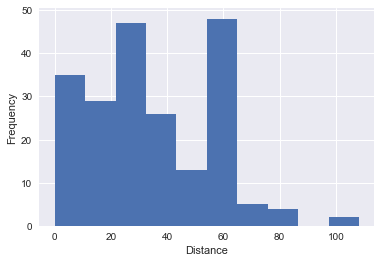

In [142]:
complete_df['distance'].hist()
plt.xlabel('Distance')
plt.ylabel('Frequency')
print ("Skewness of Distance: ", skewness(complete_df.distance))

The distribution of Distance variable skews right

Skewness of Moving Time:  0.63069381841196


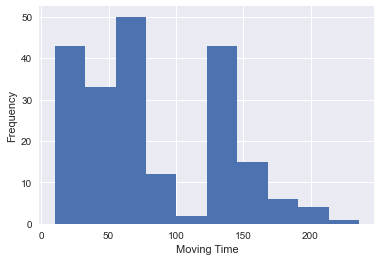

In [143]:
complete_df['moving_time'].hist()
plt.xlabel('Moving Time')
plt.ylabel('Frequency')
print ("Skewness of Moving Time: ", skewness(complete_df.elapsed_time))

The distribution of Moving Time variable skews right

Skewness of Average Speed:  -0.7555630310684619


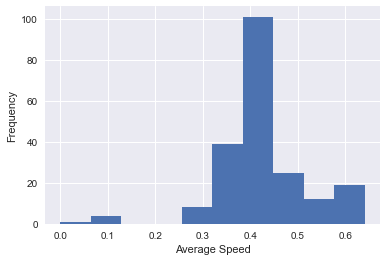

In [144]:
complete_df['average_speed'] = complete_df['distance']/complete_df['moving_time']
complete_df.average_speed.hist()
plt.xlabel('Average Speed')
plt.ylabel('Frequency')
print ("Skewness of Average Speed: ", skewness(complete_df.average_speed))

The distribution of Average Speed variable skews left

Skewness of average_heartrate:  nan


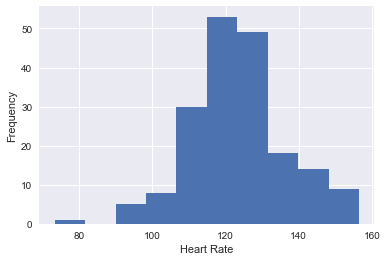

In [146]:
complete_df['average_heartrate'].hist()
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
print ("Skewness of average_heartrate: ", skewness(complete_df['average_heartrate']))

Heart Rate is normally distributed

Skewness of Average Power:  nan


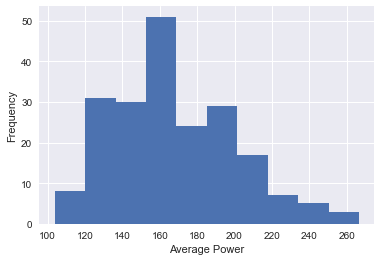

In [147]:
complete_df['average_watts'].hist()
plt.xlabel('Average Power')
plt.ylabel('Frequency')
print ("Skewness of Average Power: ", skewness(complete_df['average_watts']))

Average Power is normally distributed

Skewness of Training Stress Score:  1.0406742960001307


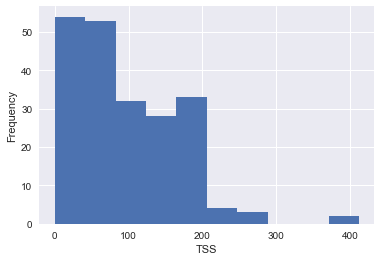

In [148]:
complete_df['TSS'].hist()
plt.xlabel('TSS')
plt.ylabel('Frequency')
print ("Skewness of Training Stress Score: ", skewness(complete_df['TSS']))

The distribution of Moving Time variable skews right

## Exploring the relationships between main variables

In [201]:
#Cleaning "elevation_gain" data
complete_df['elevation_gain_new'] = complete_df.elevation_gain.str.replace(' ','').str.replace('m','').astype(float)
print (complete_df.elevation_gain_new)

2018-01-27 19:39:49+00:00     95.0
2018-01-27 20:01:32+00:00    449.0
2018-02-05 21:06:42+00:00    439.0
2018-02-07 06:59:05+00:00    890.0
2018-02-09 19:18:03+00:00    656.0
                             ...  
2019-07-19 20:22:49+00:00    666.0
2019-07-26 20:12:56+00:00    663.0
2019-07-27 20:42:59+00:00    247.0
2019-07-27 21:47:24+00:00    415.0
2019-07-27 23:55:13+00:00    280.0
Name: elevation_gain_new, Length: 209, dtype: float64


Create a temporary dataframe to explore the relationships between Distance, Moving Time, Average Speed, Heart Rate, Power (watts), Normalised power (NP), Training Stress Score, Elevation Gain

In [151]:
temp_df = complete_df[['distance','moving_time','average_speed','average_heartrate','average_watts','NP','TSS','elevation_gain_new']]
print(temp_df.head())
print(temp_df.shape)

                           distance  moving_time  average_speed  \
2018-01-27 19:39:49+00:00       7.6           17       0.447059   
2018-01-27 20:01:32+00:00      38.6           67       0.576119   
2018-02-05 21:06:42+00:00      24.3           65       0.373846   
2018-02-07 06:59:05+00:00      47.1          134       0.351493   
2018-02-09 19:18:03+00:00      59.8          139       0.430216   

                           average_heartrate  average_watts       NP  \
2018-01-27 19:39:49+00:00              120.6          153.4  222.856   
2018-01-27 20:01:32+00:00              146.9          187.7  245.365   
2018-02-05 21:06:42+00:00              119.3          165.9  253.702   
2018-02-07 06:59:05+00:00              124.8          151.0  232.644   
2018-02-09 19:18:03+00:00              123.0          145.9  212.726   

                                TSS  elevation_gain_new  
2018-01-27 19:39:49+00:00   20.2257                95.0  
2018-01-27 20:01:32+00:00   94.5787             

Calculate correlations between each pair

In [152]:
temp_df.corr()

,distance,moving_time,average_speed,average_heartrate,average_watts,NP,TSS,elevation_gain_new
distance,1.000000,0.939383,0.172945,0.114595,0.031858,0.270703,0.922565,0.839528
moving_time,0.939383,1.000000,-0.117317,-0.048611,-0.112507,0.044431,0.871368,0.838843
average_speed,0.172945,-0.117317,1.000000,0.725904,0.698640,0.670522,0.121628,0.008474
average_heartrate,0.114595,-0.048611,0.725904,1.000000,0.672457,0.593091,0.113775,0.076712
average_watts,0.031858,-0.112507,0.698640,0.672457,1.000000,0.772574,0.150163,-0.096097
NP,0.270703,0.044431,0.670522,0.593091,0.772574,1.000000,0.432286,0.240385
TSS,0.922565,0.871368,0.121628,0.113775,0.150163,0.432286,1.000000,0.847231
elevation_gain_new,0.839528,0.838843,0.008474,0.076712,-0.096097,0.240385,0.847231,1.000000


Now, we visualize correlation between those variables via a correlation matrix heatmap

[Text(0.5, 0, 'distance'),
 Text(1.5, 0, 'moving_time'),
 Text(2.5, 0, 'average_speed'),
 Text(3.5, 0, 'average_heartrate'),
 Text(4.5, 0, 'average_watts'),
 Text(5.5, 0, 'NP'),
 Text(6.5, 0, 'TSS'),
 Text(7.5, 0, 'elevation_gain_new')]

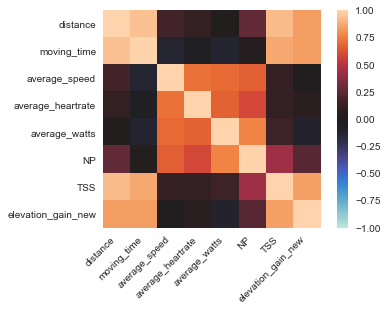

In [153]:
import seaborn as sns
corr = temp_df.corr()
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, square=True)
ax.set_xticklabels(ax.get_xticklabels(),
                  rotation=45,
                  horizontalalignment='right')

There are some clear relations obtained. For examples:
- We can clearly see Distance is positively correlated with Moving Time (corr = 0.939383), Training Stress Score (corr = 0.922565), and Elevation Gain (corr = 0.839528). This is because the longer the distance is, the harder the ride is, then, the larger your training stress score is. On the other hand, the larger elevation gain you can achieve, the longer distance that you can make.

- Similar to Distance, Moving Time has a strong positive correlation with Training Stress Score , and Elevation Gain. This is obviously because the longer the ride is, the more stressed you feel. On the other hand, Moving Time is negatively correlated with Average Speed, which can be intepreted that when you exercisefor longer and longer, your speed will be slower and slower.

- Heart Rate is positively correlated with Average Power, and Normalised Power. This is because if you put more effort to the ride, your heart rate will rise 

## Exploring the differences between 3 categories: Ride, Workout, and Race

In [155]:
RaceDf = complete_df[complete_df.workout_type == "Race"]
RideDf = complete_df[complete_df.workout_type == "Ride"]
WorkoutDf = complete_df[complete_df.workout_type == "Workout"]

print("Race df shape: ", RaceDf.shape)
print("Ride df shape: ", RideDf.shape)
print("Workout df shape: ", WorkoutDf.shape)

Race df shape:  (29, 374)
Ride df shape:  (155, 374)
Workout df shape:  (25, 374)


In [188]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure

#Creating arrays for two different categories of points
x_red = RaceDf.distance
y_red = RaceDf.TSS

x_blue = RideDf.distance
y_blue =  RideDf.TSS

x_black = WorkoutDf.distance
y_black =  WorkoutDf.TSS

#Creating the categorical scatter plot 
plot = figure(title = 'The distribution of Distance, and TSS between Ride, Workout, and Race')
plot.circle(x_red, y_red, size = 9, color = 'red', alpha = 0.5, legend = 'Race' )
plot.circle(x_blue, y_blue, size = 9, color = 'blue', alpha = 0.5, legend = 'Ride')
plot.circle(x_black, y_black, size = 9, color = 'black', alpha = 0.5, legend = 'Workout')

plot.xaxis.axis_label="Distance"
plot.yaxis.axis_label= "TSS"

plot.legend.location = "top_left"
show(plot)


Comparing to Races and Workouts, Rides have longer distance and higher training stress score

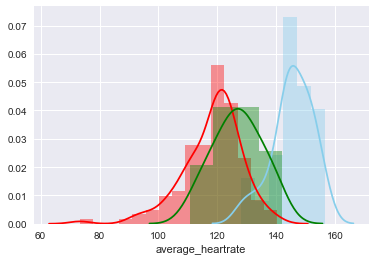

In [187]:
import seaborn as sns
sns.distplot( RaceDf['average_heartrate'] , color="skyblue", label="Race")
sns.distplot( RideDf['average_heartrate'] , color="red", label="Ride")
sns.distplot( WorkoutDf['average_heartrate'] , color="green", label="Workout")

We can see the different distribution of Heart Rate between Ride, Workout, and Race. Race is a workout type causing higher Heart Rate among riders comparing to Workout and Ride. Ride is a workout type least causing Heart Rate because of less presure and longer elapsed/ moving time comparing the other two.

 ## Exploring the relationship between rides and weather
 We want to explore relationship between rides and weather. In order to carry out this analysis, we will get weather data from Bureau of Meterology.

In [191]:
weather2018 = pd.read_csv('data/weather_data_2018.csv')
weather2019 = pd.read_csv('data/weather_data_2019.csv')
print (weather2018.shape)
print (weather2019.shape)

(365, 8)
(365, 8)


In [192]:
weather2018.dtypes

Product code                                    object
Bureau of Meteorology station number             int64
Year                                             int64
Month                                            int64
Day                                              int64
Maximum temperature (Degree C)                 float64
Days of accumulation of maximum temperature    float64
Quality                                         object
dtype: object

In [193]:
#Combining weather data of 2018 and 2019
weather2018['Date']= pd.to_datetime(weather2018[['Year','Month','Day']])
weather2019['Date']= pd.to_datetime(weather2019[['Year','Month','Day']])
weather= [weather2018,weather2019]
weatherDf= pd.concat(weather)
weatherDf.index = weatherDf.Date
weatherDf.shape
weatherDf.head()

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality,Date
Date,,,,,,,,,
2018-01-01,IDCJAC0010,66212,2018,1,1,30.9,1.0,Y,2018-01-01
2018-01-02,IDCJAC0010,66212,2018,1,2,28.8,1.0,Y,2018-01-02
2018-01-03,IDCJAC0010,66212,2018,1,3,25.3,1.0,Y,2018-01-03
2018-01-04,IDCJAC0010,66212,2018,1,4,25.4,1.0,Y,2018-01-04
2018-01-05,IDCJAC0010,66212,2018,1,5,28.9,1.0,Y,2018-01-05


In [9]:
import datetime as dt
from datetime import date

In [194]:
RideDf.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS,average_speed,elevation_gain_new
2018-01-27 19:39:49+00:00,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,222.856,0.83155,20.2257,0.447059,95.0
2018-02-05 21:06:42+00:00,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,253.702,0.94665,98.3269,0.373846,439.0
2018-02-07 06:59:05+00:00,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,232.644,0.86808,171.0780,0.351493,890.0
2018-02-09 19:18:03+00:00,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,Ride,...,0,0,0,0,0,212.726,0.79375,147.7970,0.430216,656.0
2018-02-10 20:21:37+00:00,103.9,17.0,134.9,True,7.8,19,92.00 m,8,18,Ride,...,0,0,0,0,0,192.117,0.71685,15.7590,0.433333,92.0


In [195]:
#Re-format Ride Dataset from datetime index to date index 
RideDf.index = RideDf.index.date
RideDf.head()

,average_heartrate,average_temp,average_watts,device_watts,distance,elapsed_time,elevation_gain,kudos,moving_time,workout_type,...,Rest rMSSD,Rest PNN50,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS,average_speed,elevation_gain_new
2018-01-27,120.6,21.0,153.4,True,7.6,17,95.00 m,4,17,Ride,...,0,0,0,0,0,222.856,0.83155,20.2257,0.447059,95.0
2018-02-05,119.3,19.0,165.9,True,24.3,69,439.00 m,6,65,Ride,...,0,0,0,0,0,253.702,0.94665,98.3269,0.373846,439.0
2018-02-07,124.8,20.0,151.0,True,47.1,144,890.00 m,10,134,Ride,...,0,0,0,0,0,232.644,0.86808,171.0780,0.351493,890.0
2018-02-09,123.0,20.0,145.9,True,59.8,193,656.00 m,22,139,Ride,...,0,0,0,0,0,212.726,0.79375,147.7970,0.430216,656.0
2018-02-10,103.9,17.0,134.9,True,7.8,19,92.00 m,8,18,Ride,...,0,0,0,0,0,192.117,0.71685,15.7590,0.433333,92.0


In [196]:
#Combine weather dataset and ride dataset
weather_ride= pd.concat([weatherDf, RideDf], axis=1, join='inner')
print(weather_ride.head())
print(weather_ride.shape)

           Product code  Bureau of Meteorology station number  Year  Month  \
2018-01-27   IDCJAC0010                                 66212  2018      1   
2018-02-05   IDCJAC0010                                 66212  2018      2   
2018-02-07   IDCJAC0010                                 66212  2018      2   
2018-02-09   IDCJAC0010                                 66212  2018      2   
2018-02-10   IDCJAC0010                                 66212  2018      2   

            Day  Maximum temperature (Degree C)  \
2018-01-27   27                            30.4   
2018-02-05    5                            27.4   
2018-02-07    7                            28.1   
2018-02-09    9                            31.9   
2018-02-10   10                            30.3   

            Days of accumulation of maximum temperature Quality       Date  \
2018-01-27                                          1.0       Y 2018-01-27   
2018-02-05                                          1.0       Y 2018

Now, we are interested in distance travelled per ride, average speed of ride and the temperature

In [198]:
# Create a new df to represent those features
distance_tempC = weather_ride[['distance','Maximum temperature (Degree C)','average_speed']]
print(distance_tempC .shape)

(155, 3)


In [199]:
distance_tempC.corr()

,distance,Maximum temperature (Degree C),average_speed
distance,1.000000,-0.015837,0.337015
Maximum temperature (Degree C),-0.015837,1.000000,-0.200839
average_speed,0.337015,-0.200839,1.000000


#### Relationships observed: 
- Distance travelled per ride is negatively correlated with the temperature. This is because people are more likely to ride longer when the weather is cooler.
- Average speed is also negatively correlated with the temperature. This is because people are more likely to ride faster when the weather is cooler.


## Exploring what leads to more kudos

In [202]:
#Cleaning "elevation_gain" data in weatherCombinedRide dataframe
weather_ride['elevation_gain_new']=weather_ride.elevation_gain.str.replace(' ','').str.replace('m','').astype(float)

In [203]:
#Calculate Average Speed
weather_ride['average_speed'] = weather_ride['distance']/weather_ride['moving_time']

In [204]:
#Create a new dataframe with interesting features that can potentially lead to more kudos
kudos_df = weather_ride[['kudos','Maximum temperature (Degree C)','distance','moving_time','average_speed','average_heartrate','average_watts','NP','TSS','elevation_gain_new']]

In [205]:
kudos_df.corr()

,kudos,Maximum temperature (Degree C),distance,moving_time,average_speed,average_heartrate,average_watts,NP,TSS,elevation_gain_new
kudos,1.000000,0.005531,0.861759,0.843509,0.252803,0.319804,0.166670,0.307452,0.802093,0.754719
Maximum temperature (Degree C),0.005531,1.000000,-0.015837,0.030569,-0.200839,-0.017606,-0.133781,-0.110883,-0.023819,0.089082
distance,0.861759,-0.015837,1.000000,0.954043,0.337015,0.335564,0.212389,0.363730,0.924269,0.871906
moving_time,0.843509,0.030569,0.954043,1.000000,0.101752,0.275879,0.149598,0.184982,0.876596,0.877866
average_speed,0.252803,-0.200839,0.337015,0.101752,1.000000,0.487086,0.621059,0.692507,0.307187,0.103851
average_heartrate,0.319804,-0.017606,0.335564,0.275879,0.487086,1.000000,0.439563,0.503670,0.348124,0.303779
average_watts,0.166670,-0.133781,0.212389,0.149598,0.621059,0.439563,1.000000,0.702389,0.375653,0.064008
NP,0.307452,-0.110883,0.363730,0.184982,0.692507,0.503670,0.702389,1.000000,0.535203,0.353084
TSS,0.802093,-0.023819,0.924269,0.876596,0.307187,0.348124,0.375653,0.535203,1.000000,0.880448
elevation_gain_new,0.754719,0.089082,0.871906,0.877866,0.103851,0.303779,0.064008,0.353084,0.880448,1.000000


Distance, Moving Time, and Training Stress Scored are positively correlated with kudos. Therefore, longer distance, longer moving time, higher trainning stress score are more likely to lead to more kudos. In other words, rides with longer distance and moving time are more popular. 

In [209]:
x_red = kudos_df.distance
y_red = kudos_df.kudos

plot = figure(title = 'The relationship between distance of a ride and its popularity')
plot.circle(x_red, y_red, size = 9, color = 'red', alpha = 0.5)

plot.xaxis.axis_label="Distance"
plot.yaxis.axis_label= "Kudos"

plot.legend.location = "top_left"
show(plot)


In [211]:
x_blue = kudos_df.moving_time
y_blue = kudos_df.kudos

plot = figure(title = 'The relationship between moving time of a ride and its popularity')
plot.circle(x_blue, y_blue, size = 9, color = 'blue', alpha = 0.5)

plot.xaxis.axis_label="Moving Time"
plot.yaxis.axis_label= "Kudos"

plot.legend.location = "top_left"
show(plot)

In [213]:
x_black = kudos_df.TSS
y_black = kudos_df.kudos

plot = figure(title = 'The relationship between TSS of a ride and its popularity')
plot.circle(x_black, y_black, size = 9, color = 'black', alpha = 0.5)

plot.xaxis.axis_label="Training Stress Score"
plot.yaxis.axis_label= "Kudos"

plot.legend.location = "top_left"
show(plot)

## An overall summary of activity each month over the period 2018-2019

In [306]:
#Re-generate Ride data with datetime index
RideDf = complete_df[complete_df.workout_type == "Ride"]

In [307]:
RideDf.index

DatetimeIndex(['2018-01-27 19:39:49+00:00', '2018-02-05 21:06:42+00:00',
               '2018-02-07 06:59:05+00:00', '2018-02-09 19:18:03+00:00',
               '2018-02-10 20:21:37+00:00', '2018-02-14 20:07:12+00:00',
               '2018-02-15 07:18:46+00:00', '2018-02-16 19:19:04+00:00',
               '2018-02-17 19:06:26+00:00', '2018-02-21 20:03:53+00:00',
               ...
               '2019-06-28 22:11:35+00:00', '2019-06-29 01:58:23+00:00',
               '2019-07-05 20:17:50+00:00', '2019-07-06 21:24:37+00:00',
               '2019-07-12 20:18:22+00:00', '2019-07-13 20:40:12+00:00',
               '2019-07-19 20:22:49+00:00', '2019-07-26 20:12:56+00:00',
               '2019-07-27 20:42:59+00:00', '2019-07-27 23:55:13+00:00'],
              dtype='datetime64[ns, UTC]', length=155, freq=None)

In [308]:
RideDf['month'] = pd.to_datetime(RideDf.index).month

In [351]:
monthly_df=RideDf.groupby(pd.Grouper(freq="M")).sum()

In [354]:
monthly_df.index

DatetimeIndex(['2018-01-31 00:00:00+00:00', '2018-02-28 00:00:00+00:00',
               '2018-03-31 00:00:00+00:00', '2018-04-30 00:00:00+00:00',
               '2018-05-31 00:00:00+00:00', '2018-06-30 00:00:00+00:00',
               '2018-07-31 00:00:00+00:00', '2018-08-31 00:00:00+00:00',
               '2018-09-30 00:00:00+00:00', '2018-10-31 00:00:00+00:00',
               '2018-11-30 00:00:00+00:00', '2018-12-31 00:00:00+00:00',
               '2019-01-31 00:00:00+00:00', '2019-02-28 00:00:00+00:00',
               '2019-03-31 00:00:00+00:00', '2019-04-30 00:00:00+00:00',
               '2019-05-31 00:00:00+00:00', '2019-06-30 00:00:00+00:00',
               '2019-07-31 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='M')

In [356]:
monthly_df['Average_Of_AverageSpeed']=RideDf[['average_speed']].groupby(pd.Grouper(freq="M")).mean()

In [357]:
monthly_df.head()

,average_heartrate,average_temp,average_watts,distance,elapsed_time,kudos,moving_time,axPower,aPower Relative Intensity,aBikeScore,...,Rest LF,Rest HF,HRV Recovery Points,NP,IF,TSS,average_speed,elevation_gain_new,month,Average_Of_AverageSpeed
2018-01-31 00:00:00+00:00,120.6,21.0,153.4,7.6,17,4,17,202.211,0.75452,16.6520,...,0,0,0,222.856,0.83155,20.2257,0.447059,95.0,1,0.447059
2018-02-28 00:00:00+00:00,1084.8,206.0,1599.2,380.9,1181,104,990,2173.241,8.10911,1045.5757,...,0,0,0,2401.920,8.96238,1177.7372,4.212102,6139.0,22,0.382918
2018-03-31 00:00:00+00:00,1027.4,181.0,1549.1,453.2,1454,130,1115,1974.620,7.36800,1125.3661,...,0,0,0,2189.258,8.16887,1310.6767,4.013850,4742.0,30,0.401385
2018-04-30 00:00:00+00:00,880.4,182.0,1589.2,358.4,1030,123,875,2055.969,7.67154,982.7914,...,0,0,0,2256.757,8.42074,1078.0511,3.800322,5042.0,40,0.380032
2018-05-31 00:00:00+00:00,220.0,21.0,413.7,176.6,606,43,439,546.599,2.03955,367.1340,...,0,0,0,623.897,2.32797,446.4770,1.210040,1871.0,15,0.403347


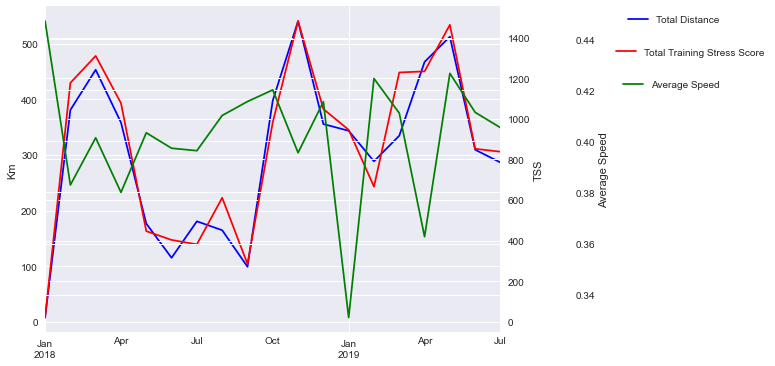

In [358]:
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame
from matplotlib.dates import DateFormatter
df = monthly_df[['distance','TSS', 'Average_Of_AverageSpeed']]

fig, ax = plt.subplots(figsize = (11,6))
df.distance.plot(ax=ax, color = 'blue', label= 'Total Distance')

ax2 = ax.twinx()
df.TSS.plot(ax=ax2, color = 'red', label = 'Total Training Stress Score')

ax3 = ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.15))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.7)
df.Average_Of_AverageSpeed.plot(ax=ax3, color= 'green', label = 'Average Speed')
ax.set_ylabel('Km')
ax2.set_ylabel('TSS')
ax3.set_ylabel('Average Speed')

ax.legend(bbox_to_anchor=(1.5, 1))
ax2.legend(bbox_to_anchor=(1.6, 0.9))
ax3.legend(bbox_to_anchor=(1.5, 0.8))

## An overall summary of activity of Jan 2019

In [345]:
#Get data for the period of January 2019
janDf = RideDf.loc['2019-01-01':'2019-01-31']
print(janDf.head())
print(janDf.shape)

                           average_heartrate  average_temp  average_watts  \
2019-01-01 19:02:50+00:00              110.9          21.0          131.9   
2019-01-03 05:59:11+00:00              118.6          23.0          126.0   
2019-01-04 19:08:10+00:00              121.4          25.0          139.7   
2019-01-08 19:56:34+00:00              117.8          18.0          152.9   
2019-01-08 20:24:02+00:00              124.9           NaN          103.7   

                          device_watts  distance  elapsed_time elevation_gain  \
2019-01-01 19:02:50+00:00         True      72.6           242       680.00 m   
2019-01-03 05:59:11+00:00         True      33.1           101       332.00 m   
2019-01-04 19:08:10+00:00         True      68.0           224       575.00 m   
2019-01-08 19:56:34+00:00         True       8.2            83       186.00 m   
2019-01-08 20:24:02+00:00         True       9.7            27       186.60 m   

                           kudos  moving_time work

In [346]:
janDf['Date'] = janDf.index.date

In [347]:
daily_df=janDf.groupby(['Date']).sum()
daily_df['Average_Of_AverageSpeed']=janDf[['Date','average_speed']].groupby(['Date']).mean()
print(daily_df.shape)

(11, 12)


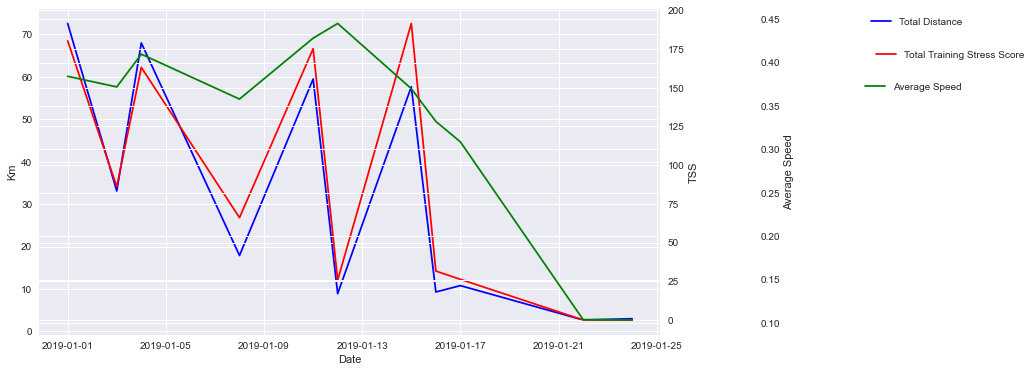

In [349]:
df = daily_df[['distance','TSS', 'Average_Of_AverageSpeed']]

fig, ax = plt.subplots(figsize = (15,6))
df.distance.plot(ax=ax, color = 'blue', label= 'Total Distance')

ax2 = ax.twinx()
df.TSS.plot(ax=ax2, color = 'red', label = 'Total Training Stress Score')

ax3 = ax.twinx()
rspine = ax3.spines['right']
rspine.set_position(('axes', 1.15))
ax3.set_frame_on(True)
ax3.patch.set_visible(False)
fig.subplots_adjust(right=0.7)
df.Average_Of_AverageSpeed.plot(ax=ax3, color= 'green', label = 'Average Speed')
ax.set_ylabel('Km')
ax2.set_ylabel('TSS')
ax3.set_ylabel('Average Speed')

ax.legend(bbox_to_anchor=(1.5, 1))
ax2.legend(bbox_to_anchor=(1.6, 0.9))
ax3.legend(bbox_to_anchor=(1.5, 0.8))

In conclusion, via analysis, this project has shown the distrution of Heart Rate, and Average Power is normally distributed while most other variables' distributions are skewed. The strong relationships between Distance, Moving Time, Training Stress Score, Elevation Gain, Average Speed, and Heart Rate are also discovered.The differences between 3 categories: Ride, Workout, and Race has been demonstrated regarding distance, training stress score, and average_heartrate variables. The project has also found that temperature is negatively correlated with distance, and average speed. Additionally, Distance, Moving Time, and Training Stress Scored are positively correlated with kudos, with rides with longer distance and moving time being more popular. Lastly, the project has illustrated an over summary of activity over the period 2018-2019, and the period of Jan 2019, with the number of km ridden each month, the sum of the Training Stress Score, and the average of the Average Speed.

